In [1]:
%matplotlib inline
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import surfdist as sd
from surfdist import viz, load, utils, surfdist

In [2]:
# load surface data and other variables
cmap = 'coolwarm'
base_dir = '/Applications/freesurfer/subjects/'
surf = nib.freesurfer.read_geometry(os.path.join(base_dir, 'bert/surf/lh.pial'))
cort = np.sort(nib.freesurfer.read_label(os.path.join(base_dir, 'bert/label/lh.cortex.label')))
sulc = nib.freesurfer.read_morph_data(os.path.join(base_dir, 'bert/surf/lh.sulc'))

# Calculate and display distance from central sulcus at each node:

In [8]:
# print all label names
sd.load.get_freesurfer_label(os.path.join(base_dir, 'bert/label/lh.aparc.a2009s.annot'))

['Unknown', 'G_and_S_frontomargin', 'G_and_S_occipital_inf', 'G_and_S_paracentral', 'G_and_S_subcentral', 'G_and_S_transv_frontopol', 'G_and_S_cingul-Ant', 'G_and_S_cingul-Mid-Ant', 'G_and_S_cingul-Mid-Post', 'G_cingul-Post-dorsal', 'G_cingul-Post-ventral', 'G_cuneus', 'G_front_inf-Opercular', 'G_front_inf-Orbital', 'G_front_inf-Triangul', 'G_front_middle', 'G_front_sup', 'G_Ins_lg_and_S_cent_ins', 'G_insular_short', 'G_occipital_middle', 'G_occipital_sup', 'G_oc-temp_lat-fusifor', 'G_oc-temp_med-Lingual', 'G_oc-temp_med-Parahip', 'G_orbital', 'G_pariet_inf-Angular', 'G_pariet_inf-Supramar', 'G_parietal_sup', 'G_postcentral', 'G_precentral', 'G_precuneus', 'G_rectus', 'G_subcallosal', 'G_temp_sup-G_T_transv', 'G_temp_sup-Lateral', 'G_temp_sup-Plan_polar', 'G_temp_sup-Plan_tempo', 'G_temporal_inf', 'G_temporal_middle', 'Lat_Fis-ant-Horizont', 'Lat_Fis-ant-Vertical', 'Lat_Fis-post', 'Medial_wall', 'Pole_occipital', 'Pole_temporal', 'S_calcarine', 'S_central', 'S_cingul-Marginalis', 'S_ci

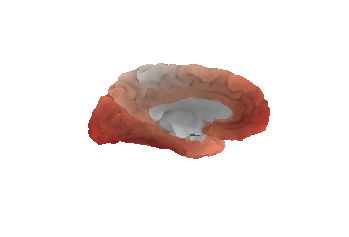

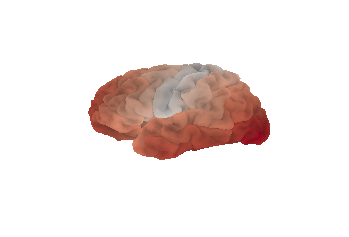

In [3]:
# load central sulcus nodes
region = 'S_central'
src  = sd.load.load_freesurfer_label(os.path.join(base_dir, 'bert/label/lh.aparc.a2009s.annot'), region, cort)

# calculate distance
dist = sd.surfdist.dist_calc(surf, cort, src)

# visualize
plot_med = sd.viz.viz(surf[0], surf[1], dist, bg_map=sulc, bg_on_stat=True, cmap=cmap)
plot_lat = sd.viz.viz(surf[0], surf[1], dist, azim=180, bg_map=sulc, bg_on_stat=True, cmap=cmap)

# Calculate distances on native surface and display on fsaverage

In [4]:
# load fsaverage4 
fsa4 = nib.freesurfer.read_geometry(os.path.join(base_dir,'fsaverage4/surf/lh.sphere.reg'))[0]
fsa4_sulc = nib.freesurfer.read_morph_data(os.path.join(base_dir, 'fsaverage4/surf/lh.sulc'))
fsa4_cort = np.sort(nib.freesurfer.read_label(os.path.join(base_dir, 'fsaverage4/label/lh.cortex.label')))
native = nib.freesurfer.read_geometry(os.path.join(base_dir, 'bert/surf/lh.sphere.reg'))[0]

# get corresponding nodes between native and fsaverage4
idx_fsa4_to_native = sd.utils.find_node_match(fsa4, native)[0]

# visualize results on fsaverage4 surface
surf_fsa4 = nib.freesurfer.read_geometry(os.path.join(base_dir, 'fsaverage4/surf/lh.pial'))

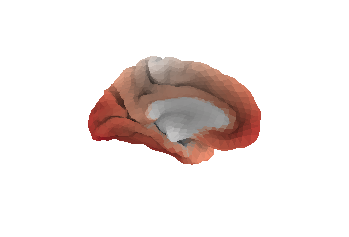

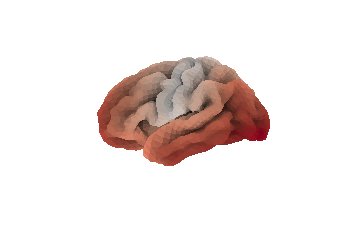

In [5]:
plot_fsa4_med = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], dist[idx_fsa4_to_native], bg_map=fsa4_sulc, bg_on_stat=True, cmap=cmap)
plot_fsa4_lat = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], dist[idx_fsa4_to_native], azim=180, bg_map=fsa4_sulc, bg_on_stat=True, cmap=cmap)

plt.show()

# Find zones closest to central sulcus or calcarine sulcus

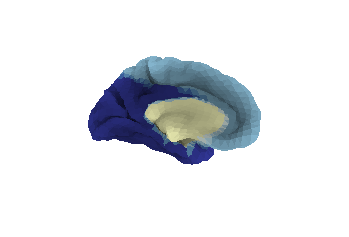

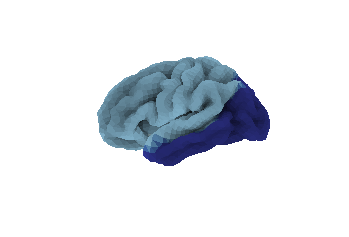

In [6]:
# load central sulcus and calcarine
regions = ['S_central', 'S_calcarine']
src = []
for r in regions:
    src.append(sd.load.load_freesurfer_label(os.path.join(base_dir, 'fsaverage4/label/lh.aparc.a2009s.annot'), r, fsa4_cort))

# calculate zones
zone = sd.surfdist.zone_calc(surf_fsa4, fsa4_cort, src)

# visualize
plot_fsa4_med = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], zone, bg_map=fsa4_sulc, bg_on_stat=True, cmap='RdYlBu', symmetric_cbar=False, )
plot_fsa4_lat = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], zone, azim=180, bg_map=fsa4_sulc, bg_on_stat=True, cmap='RdYlBu')
plt.show()